# Principal Component Analysis (PCA) Lab

## Introduction
Principal Component Analysis (PCA) is a powerful dimensionality reduction technique widely used in machine learning and data analysis. In this lab, we'll explore PCA step by step with practical examples.

### Learning Objectives
- Understand the concept and importance of PCA
- Learn how to prepare data for PCA
- Implement PCA from scratch and using scikit-learn
- Visualize and interpret PCA results
- Apply PCA for dimensionality reduction and compare model performance

## Setup
First, let's import the necessary libraries

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Set random seed for reproducibility
np.random.seed(42)


## 1. Dataset Preparation

Let's use the breast cancer dataset from scikit-learn. This dataset has 30 features, making it an excellent example to demonstrate PCA's effectiveness in dimensionality reduction.

In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# print(cancer.DESCR)

In [3]:
# Print dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names:\n{cancer.feature_names}")

Dataset shape: (569, 30)
Number of features: 30
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


We need to convert the dataset into a pandas DataFrame for easier manipulation and visualization.

In [4]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X,columns=cancer.feature_names)
df['target'] = y
# Display the first few rows of the DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X)
df['target'] = y
# Display the first few rows of the DataFrame
df.head()

## 2. Data Preprocessing

Before applying PCA, we need to:
1. Split the data into training and testing sets
2. Standardize the features

In [5]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], y_train[:5]

(array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
          0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
         -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
          3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
         -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
          1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
        [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
          3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
          0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
          1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
          2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
          3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
        [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
         -0.30735463, -0.36555756, -

## 3. Applying PCA

Now let's apply PCA and analyze the explained variance ratio to determine the optimal number of components.

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca[0:5], pca.explained_variance_ratio_.sum()

(array([[ 4.24490333,  9.13142795],
        [ 9.05375518,  0.47530955],
        [-2.27537401,  3.27847097],
        [-2.51045303,  0.74374264],
        [-2.30284792,  2.66515505]]),
 np.float64(0.6300278846854033))

Change the number of components to see how it affects the explained variance ratio.

Check with:
- n_components = 3
- n_components = 5
- n_components = 7
- n_components = 10
- n_components = 12

In [24]:
# ## Code Here
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Perform PCA
# pca = PCA(n_components=3)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

# X_train_pca[0:5], pca.explained_variance_ratio_.sum()

In [23]:
# ## Code Here
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Perform PCA
# pca = PCA(n_components=12)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

# X_train_pca[0:5], pca.explained_variance_ratio_.sum()

We can also pass the percentage of variance we want to retain to PCA, and it will automatically determine the number of components needed.

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=0.80)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca[0:5], pca.n_components_ , pca.explained_variance_ratio_.sum()

(array([[ 4.24490333,  9.13142795,  1.5042624 , -0.65098162, -4.32130566],
        [ 9.05375518,  0.47530955, -3.1982151 ,  0.70440296, -0.32446108],
        [-2.27537401,  3.27847097,  2.81636955, -0.26824216,  0.58272128],
        [-2.51045303,  0.74374264, -0.73603431,  2.52463282,  1.6395802 ],
        [-2.30284792,  2.66515505,  1.19288467, -1.26860211,  3.51642142]]),
 np.int64(5),
 np.float64(0.8452409438260114))

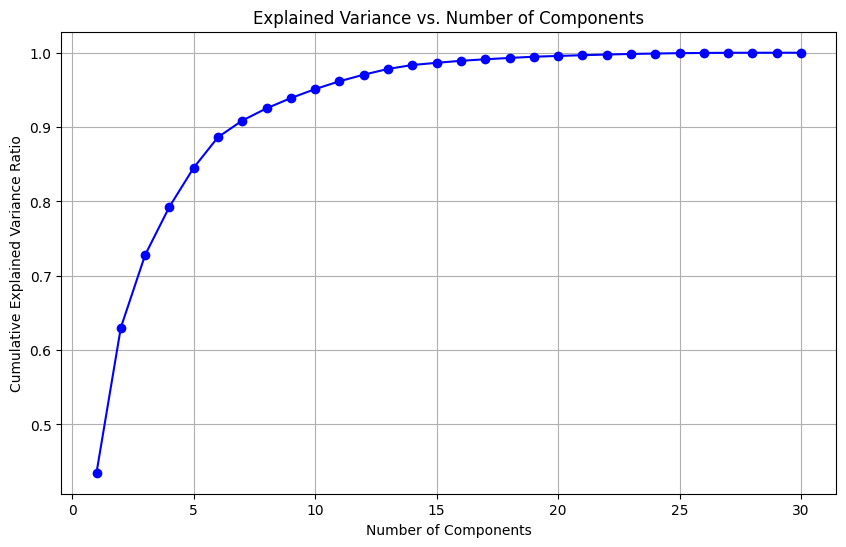

In [28]:
# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## 4. Model Comparison: Full Features vs PCA

Let's compare the performance of a logistic regression model using:
1. All original features
2. PCA-reduced features

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Train and evaluate model with all features
print("Model performance with all features:")
model_full = LogisticRegression(random_state=42)
model_full.fit(X_train_scaled, y_train)
y_pred_full = model_full.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_full):.4f}")
print("Classification Report:")

print(classification_report(y_test, y_pred_full))

Model performance with all features:
Accuracy: 0.9737
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [70]:
n_components = 10  # Set the number of components to keep

# Reduce dimensions to optimal number of components
pca_optimal = PCA(n_components=n_components)
X_train_pca_optimal = pca_optimal.fit_transform(X_train_scaled)
X_test_pca_optimal = pca_optimal.transform(X_test_scaled)


# Train and evaluate model with PCA features
print(f"\nModel performance with {n_components} PCA components:")
model_pca = LogisticRegression(random_state=42)
model_pca.fit(X_train_pca_optimal, y_train)
y_pred_pca = model_pca.predict(X_test_pca_optimal)
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_pca))


Model performance with 10 PCA components:
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Conclusion

In this lab, we've covered:
1. Working with a high-dimensional dataset (breast cancer)
2. Applying PCA for dimensionality reduction
3. Determining the optimal number of components
4. Comparing model performance with and without PCA

Key takeaways:
- PCA is effective for reducing high-dimensional data while preserving important information
- The number of components can be chosen based on explained variance ratio
- PCA can help reduce model complexity while maintaining performance
- The trade-off between dimensionality reduction and model performance should be considered